# Project Description

Sweet Lift Taxi Company has collected historical data on cab orders at airports. To attract more drivers during peak hours, we need to predict the amount of cab orders for the next hour. Build a model for such a prediction.

The RECM metric in the test set should be no more than 48.

## Project instructions.

1. Download the data and resample for one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial data set. Test the data using the test sample and provide a conclusion.

## Description of the data

The data is stored in the `taxi.csv` file. 	
The number of orders is in the `num_orders` column.

## Preparation

We are starting by importing all the libraries we are going to us on the span of all the project

In [1]:
# Pandas for dataset management
import pandas as pd
# Sklearn for machine learning practices and modelling
from sklearn.linear_model import LinearRegression
from sklearn import metrics as skmet
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# LightGBM for gradient boosting
import lightgbm as lgb
from lightgbm import LGBMRegressor
# XGBoost for the XGBoost algorithm
from xgboost import XGBRegressor
# Plotly for showing the data in dynamic graphics
import matplotlib.pyplot as plt
# Numpy for specific numeric operations
import numpy as np

Then we load the data from our csv file and transform it into a dataframe

In [2]:
df = pd.read_csv('dataset/taxi.csv',parse_dates=[0], index_col='datetime')

Show out dataframe

In [3]:
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Resample dataframe to hours

In [4]:
df = df.resample('1h').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


For utility we will also spread month, day and hour into the dataframe

In [5]:
# Make a column for the month, day and hour
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour

In [6]:
df

,num_orders,month,day,dayofweek,hour
datetime,,,,,
2018-03-01 00:00:00,124,3,1,3,0
2018-03-01 01:00:00,85,3,1,3,1
2018-03-01 02:00:00,71,3,1,3,2
2018-03-01 03:00:00,66,3,1,3,3
2018-03-01 04:00:00,43,3,1,3,4
...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,4,19
2018-08-31 20:00:00,154,8,31,4,20
2018-08-31 21:00:00,159,8,31,4,21


## Analysis

Analysing the data we will give ourselves a better understanding of what is happening each hour.

In [7]:
# Create an analysis df
analysis_df = df.copy()
# For this analysis we will see a monthly view on taxi orders for every day of the week
analysis_df['dayofweek'] = analysis_df['dayofweek'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
analysis_df['dayofweek'] = analysis_df['dayofweek'].astype('category')
analysis_df


,num_orders,month,day,dayofweek,hour
datetime,,,,,
2018-03-01 00:00:00,124,3,1,Thursday,0
2018-03-01 01:00:00,85,3,1,Thursday,1
2018-03-01 02:00:00,71,3,1,Thursday,2
2018-03-01 03:00:00,66,3,1,Thursday,3
2018-03-01 04:00:00,43,3,1,Thursday,4
...,...,...,...,...,...
2018-08-31 19:00:00,136,8,31,Friday,19
2018-08-31 20:00:00,154,8,31,Friday,20
2018-08-31 21:00:00,159,8,31,Friday,21


C:\Users\Ian Salas López\AppData\Local\Temp\ipykernel_4764\3306149402.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis_df.groupby(['month', 'dayofweek'])['num_orders'].sum().unstack().reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(15, 7), title='Taxi Orders per Month and Day of the Week')


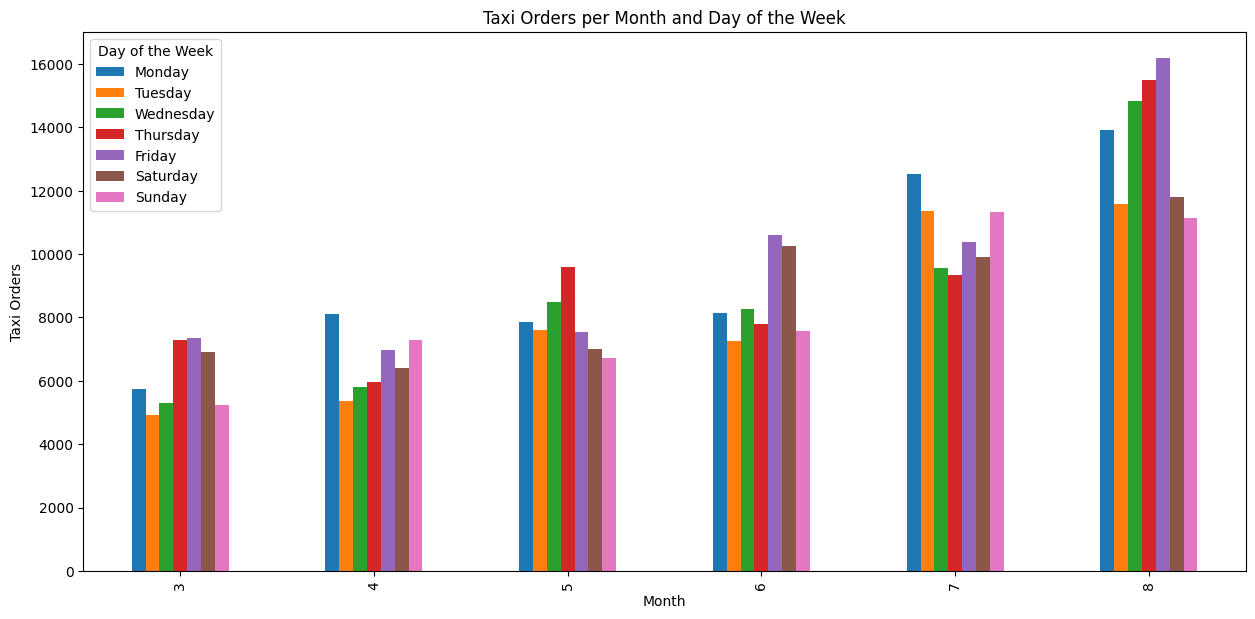

In [8]:
# Plot a bar table for every month and day of the week inside the month of the sum of taxi orders ordered from monday to sunday each month
analysis_df.groupby(['month', 'dayofweek'])['num_orders'].sum().unstack().reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(15, 7), title='Taxi Orders per Month and Day of the Week')
plt.xlabel('Month')
plt.ylabel('Taxi Orders')
plt.legend(title='Day of the Week')
plt.show()

In [9]:
analysis_df = analysis_df.drop(columns=['month', 'day', 'dayofweek', 'hour'])
analysis_df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


The first thing to take into account here is that taxi orders increase from month to month.

There is no clear indicator which day generate the most taxi orders

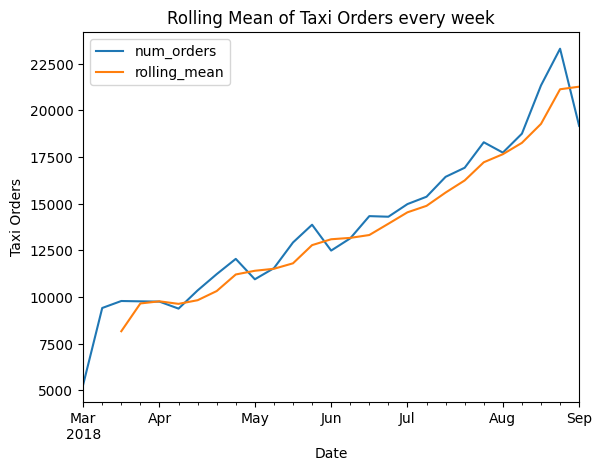

In [10]:
# We can also get the rolling mean of the data
analysis_df = analysis_df['2018-03':'2018-08'].resample('1W').sum()
# We can also get the rolling mean of the data
analysis_df['num_orders'].mean()
analysis_df['rolling_mean'] = analysis_df.rolling(window=3).mean()
analysis_df.plot()
# Plot a line chart for the rolling mean of the taxi orders
plt.xlabel('Date')
plt.ylabel('Taxi Orders')
plt.title('Rolling Mean of Taxi Orders every week')
plt.show()


We can analize that the rolling mean indicates there has been a grow on taxi orders over the months, and that a decline was detected on the last week.

## Formation

Now we are going to build 3 models to test in whichn model we can get the better RECM percentage and get it lower to 48.

## Features and target

In [11]:
# We want to separate get the features and the target
features = df.drop(columns=['num_orders'])
target = df['num_orders']
# Now we separate our dataset into a training and testing set on 10% of the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=12345, shuffle=False)

### Linear Regression

In [15]:
# We will use a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
predictions = model.predict(X_test)
# Calculate the mean absolute error
mae = skmet.mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 47.79161995546618


This model passes the metric slightly below the limit

### LightGBM

In [16]:
# Create a dataset for LightGBM model
lgb_data = lgb.Dataset(features, label=target)

# Create a LightGBM model
model = LGBMRegressor(objective='regression', metric='rmse', force_row_wise=True, max_depth=5, num_leaves=30, learning_rate=0.1, verbose=-1)
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
predictions = model.predict(X_test)
# Calculate the mean absolute error
mae = skmet.mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with depth 5 and leaves 30: {mae}')

Mean Absolute Error with depth 5 and leaves 30: 31.752065974634466


LightGBMRegressor reaches lower values using only 5 of depth and 30 leaves for the prediction. 

### XGBoost

In [17]:
# Create a LightGBM model
model = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, objective='reg:squarederror', booster='gbtree', tree_method='hist', eval_metric='rmse')
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
predictions = model.predict(X_test)
# Calculate the mean absolute error
mae = skmet.mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with estimators 100 and depth 5: {mae}')

Mean Absolute Error with estimators 100 and depth 5: 32.82292556762695
